In [1]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
import re
from bs4 import BeautifulSoup
news20 = datasets.fetch_20newsgroups()

In [2]:
import nltk

In [3]:
import sys
sys.path.append('/home/yamanishi/daily/')
from text.text_cleaning import  text_cleaning
texts=news20["data"]

texts_clean=[]
for text in texts:
    texts_clean.append(text_cleaning(text))


/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [6]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/yamanishi/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/yamanishi/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/yamanishi/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/yamanishi/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/yamanishi/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/yamani

True

In [10]:
from nltk.tokenize import word_tokenize
from graph_tool.all import *
g=Graph()
N=20
category_list=g.add_vertex(N)
word_dict={}
word_index=N+1
targets = news20['target']
label_name = news20['target_names']


/home/yamanishi/.pyenv/versions/miniconda3-latest/envs/gt/lib/python3.10/site-packages/graph_tool/draw/cairo_draw.py:634: UserWarning: Unknown parameter: layout
  warnings.warn("Unknown parameter: " + k, UserWarning)


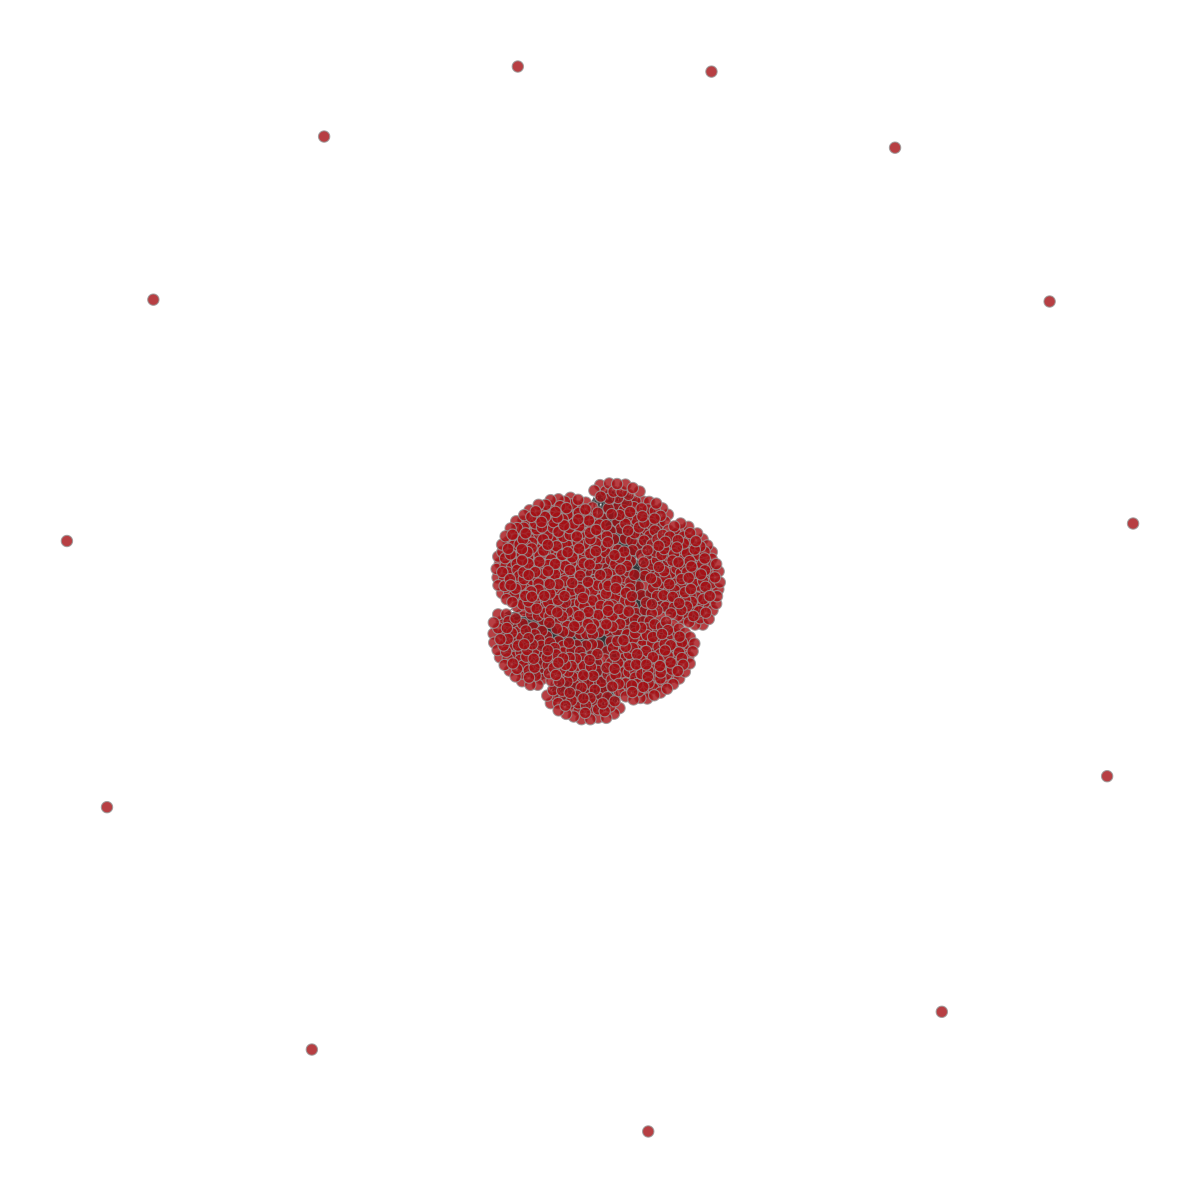

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f1d0c494370, at 0x7f1cf2f83d30>

In [13]:
import graph_tool as gt
for i,tc in enumerate(texts_clean[:10]):
    label = targets[i]
    words=word_tokenize(tc)
    for word in words:
        if word not in word_dict:
            g.add_vertex()
            word_dict[word]=word_index
            word_index+=1

        g.add_edge(label, word_dict[word])
    
gt.draw.graph_draw(g, layout="bipartite")